To develop a more accurate and efficient breast cancer screening method using thermal infrared imaging and clinical data. The authors propose a novel CADx system that uses deep learning to analyze multiple breast thermogram views and clinical data. The system achieves an overall accuracy of 90.48%, a sensitivity of 93.33%, and an AUROC curve of 0.94. This suggests that the proposed approach could be a more cost-effective and less hazardous screening option for breast cancer detection.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r"D:\BreastCancer\data.csv")

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
print(df.describe().T)

                         count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               

In [4]:
print(df.isnull().sum())
#df = df.dropna()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
#Rename Dataset to Label to make it easy to understand
df = df.rename(columns={'diagnosis':'Label'})
print(df.dtypes)

id                           int64
Label                       object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

<AxesSubplot: xlabel='Label', ylabel='count'>

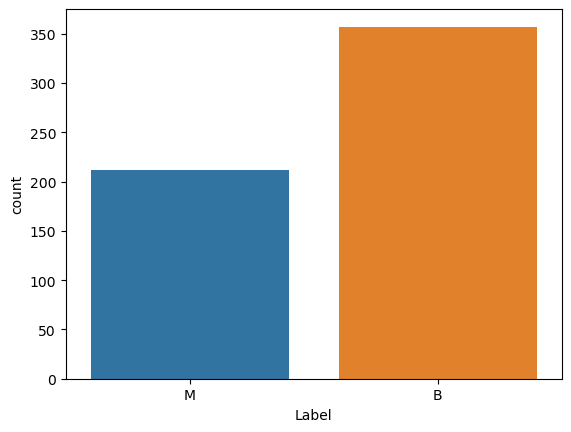

In [6]:
#Understand the data
sns.countplot(x="Label", data=df) #M - malignant   B - benign

In [7]:
####### Replace categorical values with numbers########
print("Distribution of data: ", df['Label'].value_counts())

#Define the dependent variable that needs to be predicted (labels)
y = df["Label"].values
print("Labels before encoding are: ", np.unique(y))

# Encoding categorical data from text (B and M) to integers (0 and 1)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M=1 and B=0
print("Labels after encoding are: ", np.unique(Y))

Distribution of data:  B    357
M    212
Name: Label, dtype: int64
Labels before encoding are:  ['B' 'M']
Labels after encoding are:  [0 1]


In [8]:
#Define x and normalize / scale values

#Define the independent variables. Drop label and ID, and normalize other data
X = df.drop(labels = ["Label", "id","Unnamed: 32"], axis=1)
print(X.describe().T) #Needs scaling


                         count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se             

In [9]:
#Scale / normalize the values to bring them to similar range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)  #Scaled values

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


In [10]:
#Split data into train and test to verify accuracy after fitting the model.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=40)
print("Shape of training data is: ", X_train.shape)
print("Shape of testing data is: ", X_test.shape)

Shape of training data is:  (426, 30)
Shape of testing data is:  (143, 30)


 sequential neural network. Sequential neural networks are a type of neural network that consists of a series of layers, each of which performs a specific function. The layers in a sequential neural network are typically stacked on top of each other, and the output of one layer is fed into the next layer.

The model you have provided has two hidden layers and one output layer. The hidden layers are responsible for learning the complex patterns in the data, and the output layer is responsible for making the final prediction.

The first hidden layer has 16 neurons, and it uses the rectified linear unit (ReLU) activation function. The ReLU activation function is a type of activation function that is often used in neural networks because it is simple and effective.

The second hidden layer has one neuron, and it uses the sigmoid activation function. The sigmoid activation function is a type of activation function that squashes the output of the neuron to a value between 0 and 1. This is useful for classification tasks, where the output of the neural network represents the probability of a particular class.

The output layer has one neuron, and it uses the sigmoid activation function. The output of the neural network is interpreted as the probability of the input data being malignant.

The model is compiled using the binary crossentropy loss function and the Adam optimizer. The binary crossentropy loss function is a type of loss function that is often used for classification tasks. The Adam optimizer is a type of optimizer that is often used for training neural networks because it is efficient and effective.

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [20]:
model = Sequential()
model.add(Dense(16, input_dim=30, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [21]:
#Fit with no early stopping or other callbacks
history = model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=64,
                    validation_data=(X_test, y_test))


Epoch 1/100
7/7 [==============================] - 1s 42ms/step - loss: 0.6626 - accuracy: 0.6103 - val_loss: 0.6662 - val_accuracy: 0.6294
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 0.6538 - accuracy: 0.6338 - val_loss: 0.6548 - val_accuracy: 0.6573
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6444 - accuracy: 0.6620 - val_loss: 0.6429 - val_accuracy: 0.6993
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6348 - accuracy: 0.7042 - val_loss: 0.6304 - val_accuracy: 0.7343
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 0.6227 - accuracy: 0.7160 - val_loss: 0.6160 - val_accuracy: 0.7552
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6080 - accuracy: 0.7559 - val_loss: 0.5968 - val_accuracy: 0.8042
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 0.5822 - accuracy: 0.8122 - val_loss: 0.5732 - val_accuracy: 0.8392
Epoch 8/100
7/7 [=========

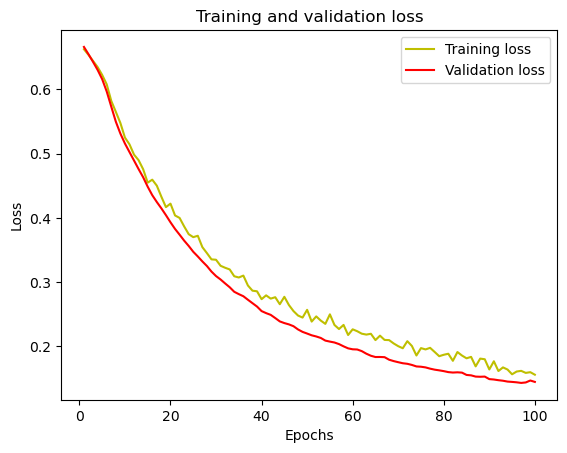

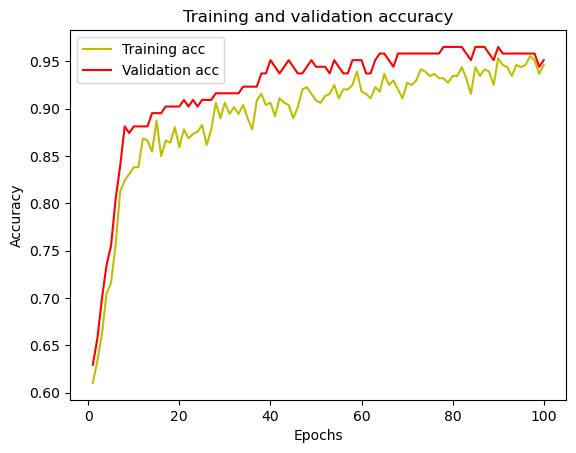

In [22]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

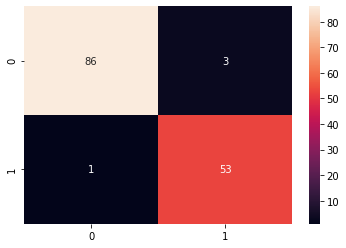

In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

ModuleNotFoundError: No module named 'streamlit'

In [27]:
df.head()

,id,Label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [1]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.14.0
